In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv('elantra.csv')


In [2]:
df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)

df = df.sort_values(by=["Year", "Month"]).reset_index(drop=True)

In [3]:
df.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,2,2010,7966,9.8,130,209.924,217.251
2,3,2010,8225,9.9,138,209.163,217.305
3,4,2010,9657,9.9,132,209.024,217.376
4,5,2010,9781,9.6,177,206.172,217.299


In [4]:
df.shape

(50, 7)

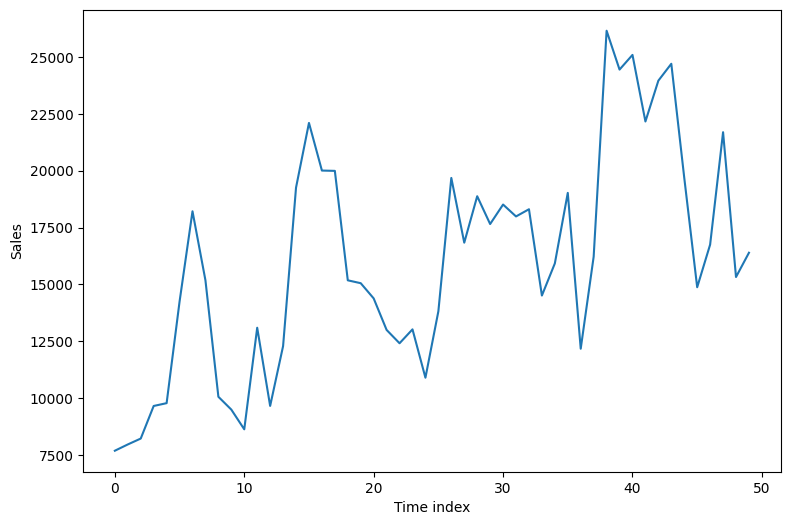

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(df.ElantraSales.values)
plt.xlabel('Time index')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='Unemployment', ylabel='Count'>

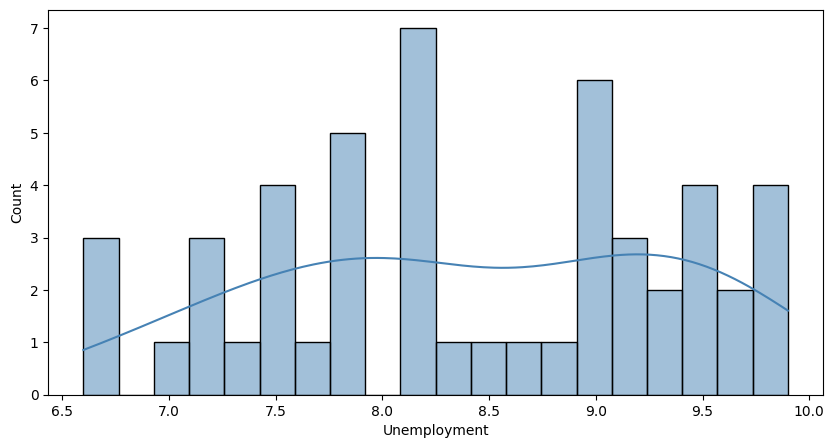

In [6]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['Unemployment'].dropna(), bins=20, kde=True, color='steelblue')

In [7]:
cols = ["Unemployment", "Queries", "CPI_energy", "CPI_all","ElantraSales"]
df_filtered = df[cols].dropna()

corr = df_filtered.corr()

<Axes: >

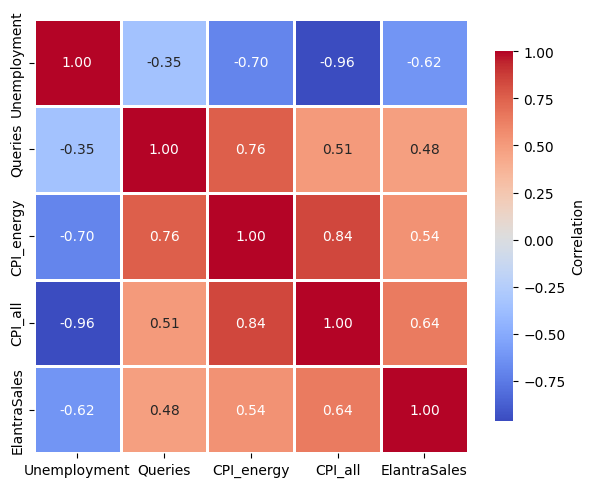

In [8]:
plt.figure(figsize=(7, 6))
sns.heatmap(
    corr,
    annot=True,          # hiển thị giá trị trong ô
    fmt=".2f",           # làm tròn 2 chữ số
    cmap="coolwarm",     # thang màu
    square=True,         # ô vuông
    linewidths=0.8,      # khoảng trắng giữa các ô
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # thanh màu
)

<Axes: xlabel='Queries', ylabel='Count'>

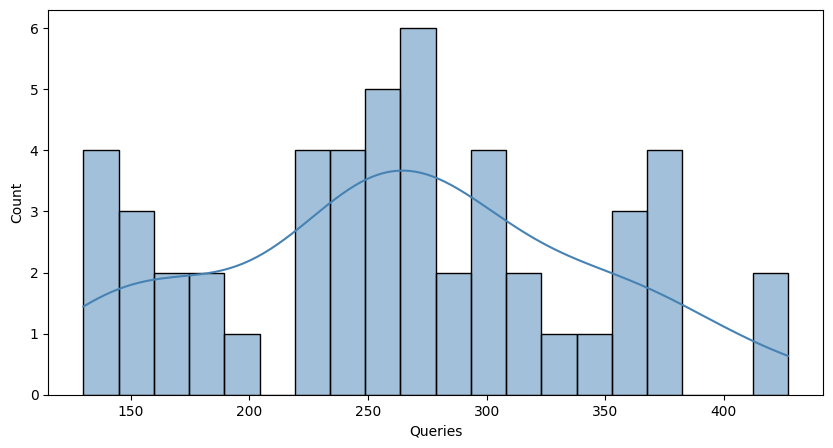

In [9]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['Queries'].dropna(), bins=20, kde=True, color='steelblue')

<Axes: xlabel='CPI_energy', ylabel='Count'>

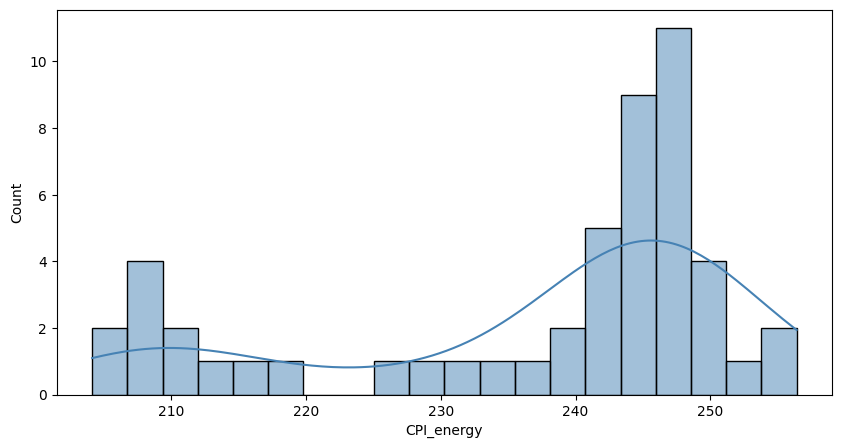

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['CPI_energy'].dropna(), bins=20, kde=True, color='steelblue')

<Axes: xlabel='CPI_all', ylabel='Count'>

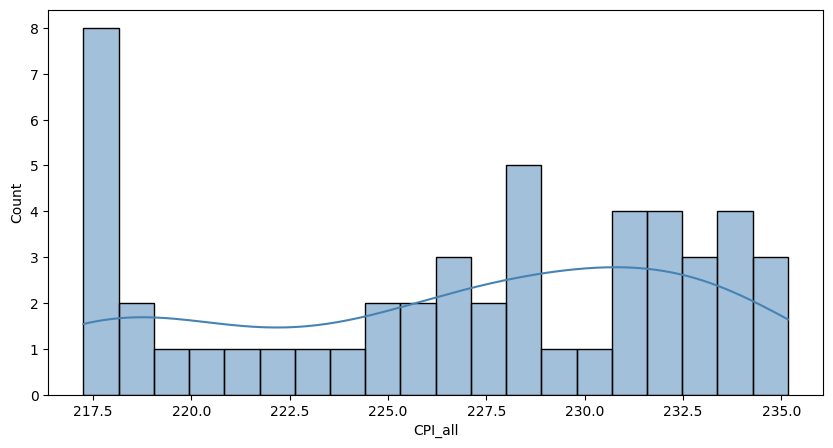

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['CPI_all'].dropna(), bins=20, kde=True, color='steelblue')

In [12]:
from statsmodels.tsa.stattools import adfuller

for c in cols:
    result = adfuller(df[c].dropna())
    print(f"{c}: p-value = {result[1]:.4f}")

Unemployment: p-value = 0.9960
Queries: p-value = 0.1434
CPI_energy: p-value = 0.3166
CPI_all: p-value = 0.5945
ElantraSales: p-value = 0.0398


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[["Unemployment", "Queries", "CPI_energy", "CPI_all"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Feature          VIF
0  Unemployment    71.731234
1       Queries    34.971448
2    CPI_energy  1507.797145
3       CPI_all  1532.383524


In [14]:
month_onehot_train = pd.get_dummies(df.Month)
month_onehot_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False


In [15]:
df1 = df.join(month_onehot_train)
df1.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2010,7690,9.7,153,213.377,217.466,True,False,False,False,False,False,False,False,False,False,False,False
1,2,2010,7966,9.8,130,209.924,217.251,False,True,False,False,False,False,False,False,False,False,False,False
2,3,2010,8225,9.9,138,209.163,217.305,False,False,True,False,False,False,False,False,False,False,False,False
3,4,2010,9657,9.9,132,209.024,217.376,False,False,False,True,False,False,False,False,False,False,False,False
4,5,2010,9781,9.6,177,206.172,217.299,False,False,False,False,True,False,False,False,False,False,False,False


In [16]:
df1.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2010,7690,9.7,153,213.377,217.466,True,False,False,False,False,False,False,False,False,False,False,False
1,2,2010,7966,9.8,130,209.924,217.251,False,True,False,False,False,False,False,False,False,False,False,False
2,3,2010,8225,9.9,138,209.163,217.305,False,False,True,False,False,False,False,False,False,False,False,False
3,4,2010,9657,9.9,132,209.024,217.376,False,False,False,True,False,False,False,False,False,False,False,False
4,5,2010,9781,9.6,177,206.172,217.299,False,False,False,False,True,False,False,False,False,False,False,False


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Unemployment", "Queries", "CPI_energy", "CPI_all"]])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Tỷ lệ phương sai giữ lại:", pca.explained_variance_ratio_)

Tỷ lệ phương sai giữ lại: [0.77294537 0.19308123]


In [18]:
X_pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],     
    index=df.index)
print(X_pca_df.head())


        PC1       PC2
0 -2.949849 -0.230937
1 -3.266156 -0.441403
2 -3.298349 -0.321066
3 -3.328528 -0.386125
4 -3.037927 -0.144907


In [19]:
X_pca_df.head()

,PC1,PC2
0,-2.949849,-0.230937
1,-3.266156,-0.441403
2,-3.298349,-0.321066
3,-3.328528,-0.386125
4,-3.037927,-0.144907


In [20]:
df2 = X_pca_df.join(month_onehot_train)
df2.head()

,PC1,PC2,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.949849,-0.230937,True,False,False,False,False,False,False,False,False,False,False,False
1,-3.266156,-0.441403,False,True,False,False,False,False,False,False,False,False,False,False
2,-3.298349,-0.321066,False,False,True,False,False,False,False,False,False,False,False,False
3,-3.328528,-0.386125,False,False,False,True,False,False,False,False,False,False,False,False
4,-3.037927,-0.144907,False,False,False,False,True,False,False,False,False,False,False,False


In [21]:
df2 = df2.join(df["ElantraSales"])
df2.head()


,PC1,PC2,1,2,3,4,5,6,7,8,9,10,11,12,ElantraSales
0,-2.949849,-0.230937,True,False,False,False,False,False,False,False,False,False,False,False,7690
1,-3.266156,-0.441403,False,True,False,False,False,False,False,False,False,False,False,False,7966
2,-3.298349,-0.321066,False,False,True,False,False,False,False,False,False,False,False,False,8225
3,-3.328528,-0.386125,False,False,False,True,False,False,False,False,False,False,False,False,9657
4,-3.037927,-0.144907,False,False,False,False,True,False,False,False,False,False,False,False,9781


In [22]:
bool_cols = [i for i in range(1, 13)]   # danh sách cột 1–12
df2[bool_cols] = df2[bool_cols].astype(int)
df2.head()

,PC1,PC2,1,2,3,4,5,6,7,8,9,10,11,12,ElantraSales
0,-2.949849,-0.230937,1,0,0,0,0,0,0,0,0,0,0,0,7690
1,-3.266156,-0.441403,0,1,0,0,0,0,0,0,0,0,0,0,7966
2,-3.298349,-0.321066,0,0,1,0,0,0,0,0,0,0,0,0,8225
3,-3.328528,-0.386125,0,0,0,1,0,0,0,0,0,0,0,0,9657
4,-3.037927,-0.144907,0,0,0,0,1,0,0,0,0,0,0,0,9781


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [24]:
X = df2.drop(columns = ["ElantraSales"])
y = df2["ElantraSales"]
X.columns = X.columns.astype(str)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

print("Test R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred))
)


Test R²: 0.6960676250987228
MAE: 1678.8338683698883
RMSE: 2084.2366028188776


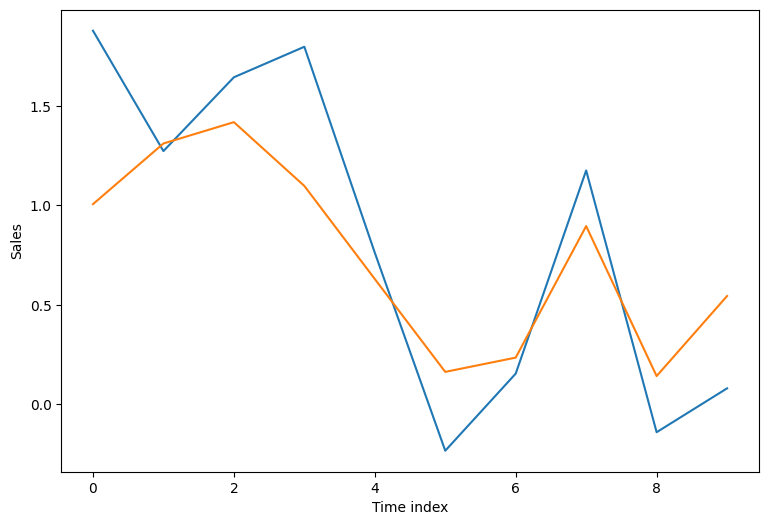

In [26]:
plt.figure(figsize=(9,6))
plt.plot(y_test)
4
plt.plot(y_pred_scaled)
plt.xlabel('Time index')
plt.ylabel('Sales')
# function to show the plot
plt.show()

In [27]:
import joblib

# Lưu model và scaler
joblib.dump(model, "linear_model.pkl")
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']